In [305]:
import pandas as pd

In [306]:
pwc = pd.read_csv("C:/Users/pc/Documents/Tomek/Data science/Opinions/opinions_PwC.csv")
print(pwc.shape)
pwc.head()

(306, 2)


,Opinion,Timestamp
0,"Pracuję w tej firmie już całkiem sporo czasu, ...",2020-12-29 22:16:00
1,Głoszone na „prawo i lewo” wartości PWC to jak...,2021-03-20 11:44:00
2,Mamy połowę 2021 roku natomiast pensje w FCU s...,2021-06-02 11:39:00
3,Pracuje w PwC 2 lata i uważam że jest to w por...,2021-06-28 23:05:00
4,"nareszcie, dzis byla info o podwyzkach i bonus...",2020-10-23 10:11:00


In [307]:
ey = pd.read_csv("C:/Users/pc/Documents/Tomek/Data science/Opinions/opinions_EY.csv")
kpmg = pd.read_csv("C:/Users/pc/Documents/Tomek/Data science/Opinions/opinions_KPMG.csv")
deloitte = pd.read_csv("C:/Users/pc/Documents/Tomek/Data science/Opinions/opinions_Deloitte.csv")
print(ey.shape)
print(kpmg.shape)
print(deloitte.shape)

(198, 2)
(101, 2)
(101, 2)


In [308]:
pwc.drop_duplicates(inplace=True)
ey.drop_duplicates(inplace=True)
kpmg.drop_duplicates(inplace=True)
deloitte.drop_duplicates(inplace=True)
print(pwc.shape)
print(ey.shape)
print(kpmg.shape)
print(deloitte.shape)

(306, 2)
(195, 2)
(99, 2)
(98, 2)


### Now we will translate opinions into English. This will enable us to manage misspellings because translators have imbedded solutions for that. However, the main reason for that is that we need English data to use TextBlob algorithm for sentiment analysis.

In [309]:
pip install deep-translator

Note: you may need to restart the kernel to use updated packages.


In [310]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='pl', target='en')

## Let's try which way is more effective: translate or translate_batch.

In [311]:
ey_x = ey.loc[:5, ['Opinion']]
ey_x

,Opinion
0,Nie polecam. Pracowałem w tej firmie prawie 5 ...
1,"Hej, \npracuję w tej firmie od 2 lat na stanow..."
2,skoro Jan Krzysztof Bielecki ( były premier ) ...
3,Przedstawiciel firmt podczas rozmowy starała s...
4,"firma wspaniała, tylko ludzie..."
5,Proces rekrutacji to jest jakiś wyższy poziom ...


In [312]:
import time
start_time = time.time()

print(ey_x['Opinion'].apply(lambda x: translator.translate(x)))
print(time.time()-start_time)

0    I do not recommend. I have worked in this comp...
1    Hi,\nI have been working in this company for 2...
2    since Jan Krzysztof Bielecki (former prime min...
3    During the interview, the representative of th...
4                       great company, only people ...
5    The recruiting process is a higher level of ab...
Name: Opinion, dtype: object
1.5345447063446045


In [314]:
start_time = time.time()
print(translator.translate_batch(list(ey_x['Opinion'].values)))
print(time.time()-start_time)

Please wait.. This may take a couple of seconds because deep_translator sleeps for two seconds after each request in order to not spam the google server.
sentence number  1  has been translated successfully
sentence number  2  has been translated successfully
sentence number  3  has been translated successfully
sentence number  4  has been translated successfully
sentence number  5  has been translated successfully
sentence number  6  has been translated successfully
['I do not recommend. I have worked in this company for almost 5 years.\n1. Disrespect for employees - treating employees as objects.\n2. Routine tasks (sumif / vlookup) 12-16 hour picking from Monday to Friday as well as Saturday and Sunday.\n3. Believe me, you won\'t learn too much in this company, but they will tell you something else. This is the company\'s strategy. The more you sit there, the worse it is for you, because later on it will be difficult for you to find another job. Those from the managerial level and ab

### It turns out that 'translate' is much more efficient. Let's use it for all opinions and save it as csv files.

In [ ]:
kpmg_eng = kpmg['Opinion'].apply(lambda x: translator.translate(x))
kpmg_eng

In [ ]:
KPMG_eng = pd.DataFrame([kpmg_eng, kpmg['Timestamp']]).transpose()
KPMG_eng

In [14]:
KPMG_eng.to_csv('KPMG_eng.csv', index=False)

In [15]:
deloitte_eng = deloitte['Opinion'].apply(lambda x: translator.translate(x))
deloitte_eng

0      Inflated professionalism that has nothing to d...
1      I am a little amused by the frustrations below...
2      I am sorry but I read these opinions here and ...
3      Avoid a wide berth. The salaries are such that...
4      I participated in an over-hour conversation ab...
                             ...                        
96     Do they accept apprenticeships for statutory a...
97     and do they accept students / graduates after ...
98     How is he paying? I am also interested in the ...
99     There is a lot of recruiting, but that doesn't...
100                              do they pay well there?
Name: Opinion, Length: 98, dtype: object

In [16]:
Deloitte_eng = pd.DataFrame([deloitte_eng, deloitte['Timestamp']]).transpose()
Deloitte_eng

,Opinion,Timestamp
0,Inflated professionalism that has nothing to d...,2020-07-14 15:21:00
1,I am a little amused by the frustrations below...,2017-10-25 21:59:00
2,I am sorry but I read these opinions here and ...,2020-05-07 06:22:00
3,Avoid a wide berth. The salaries are such that...,2021-01-18 09:37:00
4,I participated in an over-hour conversation ab...,2021-05-26 08:58:00
...,...,...
96,Do they accept apprenticeships for statutory a...,2016-03-11 08:53:00
97,and do they accept students / graduates after ...,2016-02-26 18:51:00
98,How is he paying? I am also interested in the ...,2015-10-31 00:27:00
99,"There is a lot of recruiting, but that doesn't...",2015-10-15 22:18:00


In [17]:
Deloitte_eng.loc[:99, :].to_csv('deloitte_eng.csv', index=False)

In [42]:
ey_eng = ey['Opinion'].apply(lambda x: translator.translate(x))
ey_eng

0      I do not recommend. I have worked in this comp...
1      Hi,\nI have been working in this company for 2...
2      since Jan Krzysztof Bielecki (former prime min...
3      During the interview, the representative of th...
4                         great company, only people ...
                             ...                        
193    When it comes to work in accounting services, ...
194    I confirm what has been written above by mr mi...
195                   In this case, it is naive optimism
196    Better to hire former and current agents like ...
197    We hire the best ... just right.\n\nThere is n...
Name: Opinion, Length: 195, dtype: object

In [43]:
EY_eng = pd.DataFrame([ey_eng, ey['Timestamp']]).transpose()
EY_eng

,Opinion,Timestamp
0,I do not recommend. I have worked in this comp...,2019-04-21 20:08:00
1,"Hi,\nI have been working in this company for 2...",2020-06-11 17:16:00
2,since Jan Krzysztof Bielecki (former prime min...,2020-12-31 15:28:00
3,"During the interview, the representative of th...",2021-07-14 14:22:00
4,"great company, only people ...",2021-06-09 18:35:00
...,...,...
193,"When it comes to work in accounting services, ...",2013-12-06 23:45:00
194,I confirm what has been written above by mr mi...,2013-02-01 11:53:00
195,"In this case, it is naive optimism",2013-01-24 04:15:00
196,Better to hire former and current agents like ...,2012-07-18 17:14:00


In [44]:
EY_eng.to_csv('ey_eng.csv', index=False)

In [45]:
pwc_eng = pwc['Opinion'].apply(lambda x: translator.translate(x))
pwc_eng

0      I've been working in this company for quite a ...
1      The PWC values ​​proclaimed on the "right and ...
2      We are in mid-2021, while salaries at FCU are ...
3      I have been working at PwC for 2 years and I t...
4      finally, today there was info about hikes and ...
                             ...                        
301    A great place to meet really smart people, lea...
302    honestly, you are part of a huge machine, your...
303    general psychosis enveloped in happiness - cor...
304    people like rats / work to lose strength / the...
305           A typical corporation in a negative sense.
Name: Opinion, Length: 306, dtype: object

In [46]:
PWC_eng = pd.DataFrame([pwc_eng, pwc['Timestamp']]).transpose()
PWC_eng

,Opinion,Timestamp
0,I've been working in this company for quite a ...,2020-12-29 22:16:00
1,"The PWC values ​​proclaimed on the ""right and ...",2021-03-20 11:44:00
2,"We are in mid-2021, while salaries at FCU are ...",2021-06-02 11:39:00
3,I have been working at PwC for 2 years and I t...,2021-06-28 23:05:00
4,"finally, today there was info about hikes and ...",2020-10-23 10:11:00
...,...,...
301,"A great place to meet really smart people, lea...",2014-10-16 15:31:00
302,"honestly, you are part of a huge machine, your...",2011-01-21 14:13:00
303,general psychosis enveloped in happiness - cor...,2010-12-02 13:30:00
304,people like rats / work to lose strength / the...,2010-12-02 13:29:00


In [47]:
PWC_eng.to_csv('pwc_eng.csv', index=False)

## Now let's load our files into pandas Dataframes.

In [315]:
import pandas as pd
pwc = pd.read_csv("C:/Users/pc/Documents/Tomek/Data science/Opinions/pwc_eng.csv")
ey = pd.read_csv("C:/Users/pc/Documents/Tomek/Data science/Opinions/ey_eng.csv")
kpmg = pd.read_csv("C:/Users/pc/Documents/Tomek/Data science/Opinions/kpmg_eng.csv")
deloitte = pd.read_csv("C:/Users/pc/Documents/Tomek/Data science/Opinions/deloitte_eng.csv")

### Some posts turn out to be comments to other posts in the dataset so we have to get rid of them. They have one distinctive mark - all contain '@'.

In [316]:
dfs = []
for df in [pwc, ey, kpmg, deloitte]:
    df_temp = df[df['Opinion'].apply(lambda x: True if '@' not in x else False)]
    dfs.append(df_temp)

In [317]:
dfs[0].to_string()[:10000] # now pwc is dfs[0], I can see that there are posts deleted by administrator and thus empty, 
# let's get rid of them

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [318]:
dfs[0]['Opinion'][dfs[0]['Opinion'].str.contains('deleted by administrator')] # it should be noted that 'deleted by administrator'
# string is also in posts that contained vulgarisms and we do not want to get rid of those posts
# we only want to get rid of empty posts because of administrator's intervention
# To do that, we can use str.endswith python funcion that enables us to check whether string ends with another string

6      I do not recommend.\nThe entire course of the ...
19                            (deleted by administrator)
28     Opinion on recruitment for the branch in Gdańs...
35                            (deleted by administrator)
170                           (deleted by administrator)
174    I worked at PwC a lot after hours. You have to...
225                           (deleted by administrator)
226                           (deleted by administrator)
228                           (deleted by administrator)
229                           (deleted by administrator)
230                           (deleted by administrator)
231                           (deleted by administrator)
232                           (deleted by administrator)
234                           (deleted by administrator)
235                           (deleted by administrator)
236                           (deleted by administrator)
237                           (deleted by administrator)
238                           (

In [319]:
dfs2= []
# we check if it ends with 'administrator)' and take only those which do not
for df in dfs:
    df_temp = df[df['Opinion'].apply(lambda x: not x.endswith('administrator)'))]
    dfs2.append(df_temp)

In [320]:
dfs2[0].to_string()[:10000] # We got rid of those posts successfully
# I can see that there is significant amount of posts that are actually questions so let's reject them based on 
# existence of '?' in them

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [321]:
dfs3 = []
for df in dfs2:
    df_temp = df[df['Opinion'].apply(lambda x: True if '?' not in x else False)]
    dfs3.append(df_temp)

In [322]:
dfs3[0].to_string()[:10000]

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [323]:
dfs3[1]

,Opinion,Timestamp
0,I do not recommend. I have worked in this comp...,2019-04-21 20:08:00
2,since Jan Krzysztof Bielecki (former prime min...,2020-12-31 15:28:00
3,"During the interview, the representative of th...",2021-07-14 14:22:00
4,"great company, only people ...",2021-06-09 18:35:00
5,The recruiting process is a higher level of ab...,2021-06-01 11:05:00
...,...,...
185,It is mainly consulting and auditing. They see...,2015-03-16 07:30:00
189,The company prides itself on not keeping gradu...,2014-09-16 12:13:00
191,I confirm what has been written above by mr mi...,2013-02-01 11:53:00
192,"In this case, it is naive optimism",2013-01-24 04:15:00


## Now it's high time to preprocess our data and get rid of all marks, digits or unnecessary whitespaces.

In [324]:
import re

In [325]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text) # substitute \n with whitespace
    text = re.sub(r'\d+', '', text) # substitute 1 or more digits with nothing
    text = re.sub(r'\'s', '', text) #substitute \'s with nothing
    text = re.sub(r'[.*(),\':"/!-;]', '',text) # when we have symbols in square brackets, we do not have to place \ before them
    # before ' [ and ] we have to, however
    text = re.sub(r'\[', '', text) # substitute [ and ] with nothing
    text = re.sub(r'\]', '', text)
    text = re.sub(r'\s[a-zA-Z]\s', ' ', text) # substitute spaceletterspace combination with space, to get rid of single letters
    text = re.sub(r'\s+', ' ', text) # if there's one or more whitespaces, substitute with one whitespace
    return text

In [326]:
dfs4 = []
for df in dfs3:
    timestamp = df['Timestamp']
    opinion = df['Opinion'].apply(lambda x: clean_text_round1(x))
    dfs4.append(pd.DataFrame([timestamp, opinion]).transpose())

In [327]:
dfs5 = [] # resets index to have it from 1 to len
for df in dfs4:
    dfs5.append(df.reset_index(drop=True))

In [328]:
pwc_clean = dfs5[0]
ey_clean = dfs5[1]
kpmg_clean = dfs5[2]
deloitte_clean = dfs5[3]
print(pwc_clean.shape, ey_clean.shape, kpmg_clean.shape, deloitte_clean.shape)

(139, 2) (88, 2) (51, 2) (45, 2)


In [329]:
from wordcloud import WordCloud, STOPWORDS

## Now we will visualise common words in posts for every single company. 
#### To do that, we need to aggregate all posts for a given company.

In [330]:
ops_aggregated = {} # we make dictionary of aggregated posts for every employer
for df, name in zip([pwc_clean, ey_clean, kpmg_clean, deloitte_clean], ['pwc', 'ey', 'kpmg', 'deloitte']):
    ops_aggregated[name] = ' '.join(df['Opinion'].to_list())
ops_aggregated['pwc'][:100]

'ive been working in this company for quite long time so can say this and that fcu gdańsk large germa'

In [331]:
wc = WordCloud(background_color='white', max_words=700, height=250, stopwords=STOPWORDS, min_font_size=7) 

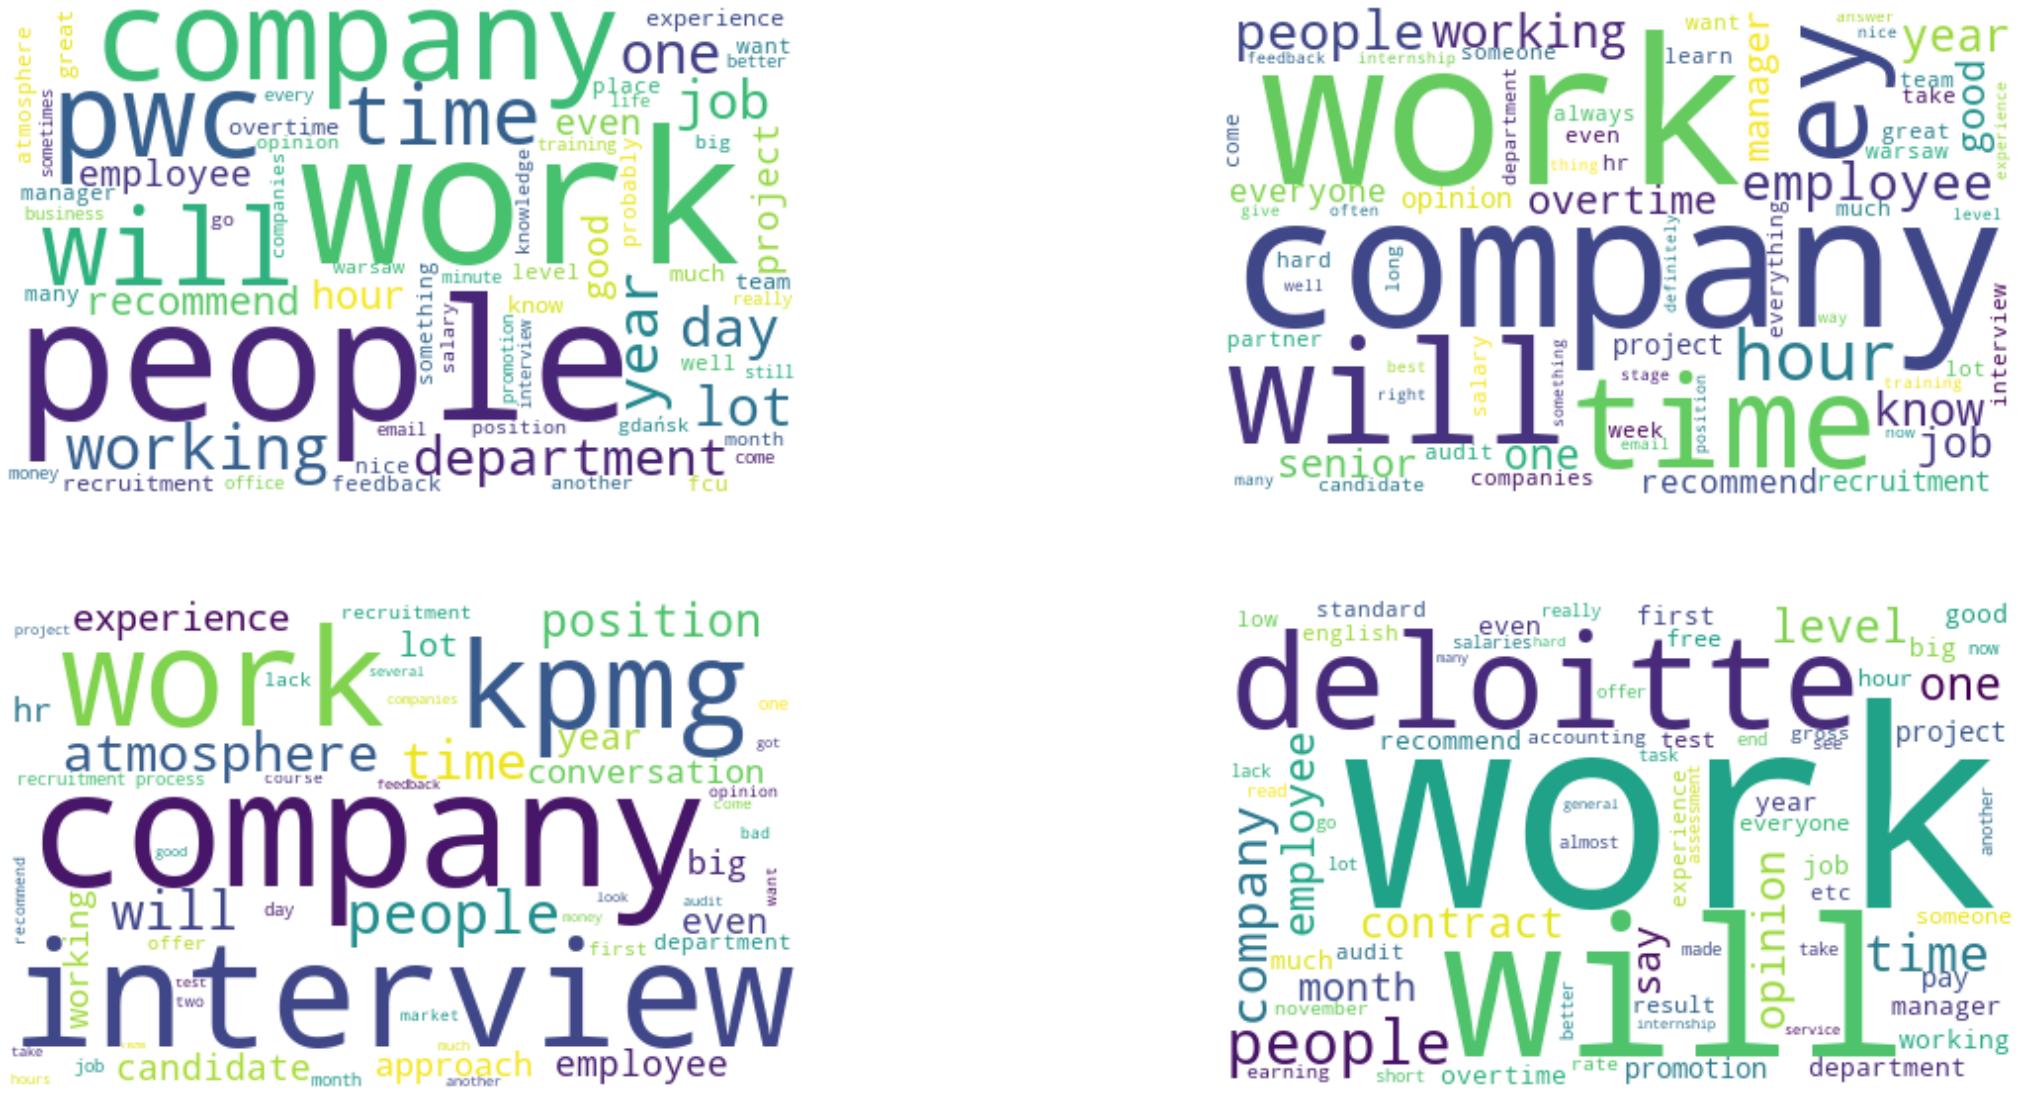

In [332]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize = (40,20))

for idx, name in enumerate(['pwc', 'ey', 'kpmg', 'deloitte']):
    wc = wc.generate(ops_aggregated[name])
    axes.flatten()[idx].imshow(wc, interpolation = 'bilinear')
    axes.flatten()[idx].axis('off')
plt.show()

In [335]:
# now I'll add some additional stopwords
my_stopwords  = ['will', 'one', 'still', 'even', 'year', 'month', 'opinion', 'say', 'company', 'working', 'pwc', 'kpmg', \
                'deloitte', 'ey', 'work', 'another', 'day']
stopwords = STOPWORDS.union(my_stopwords)

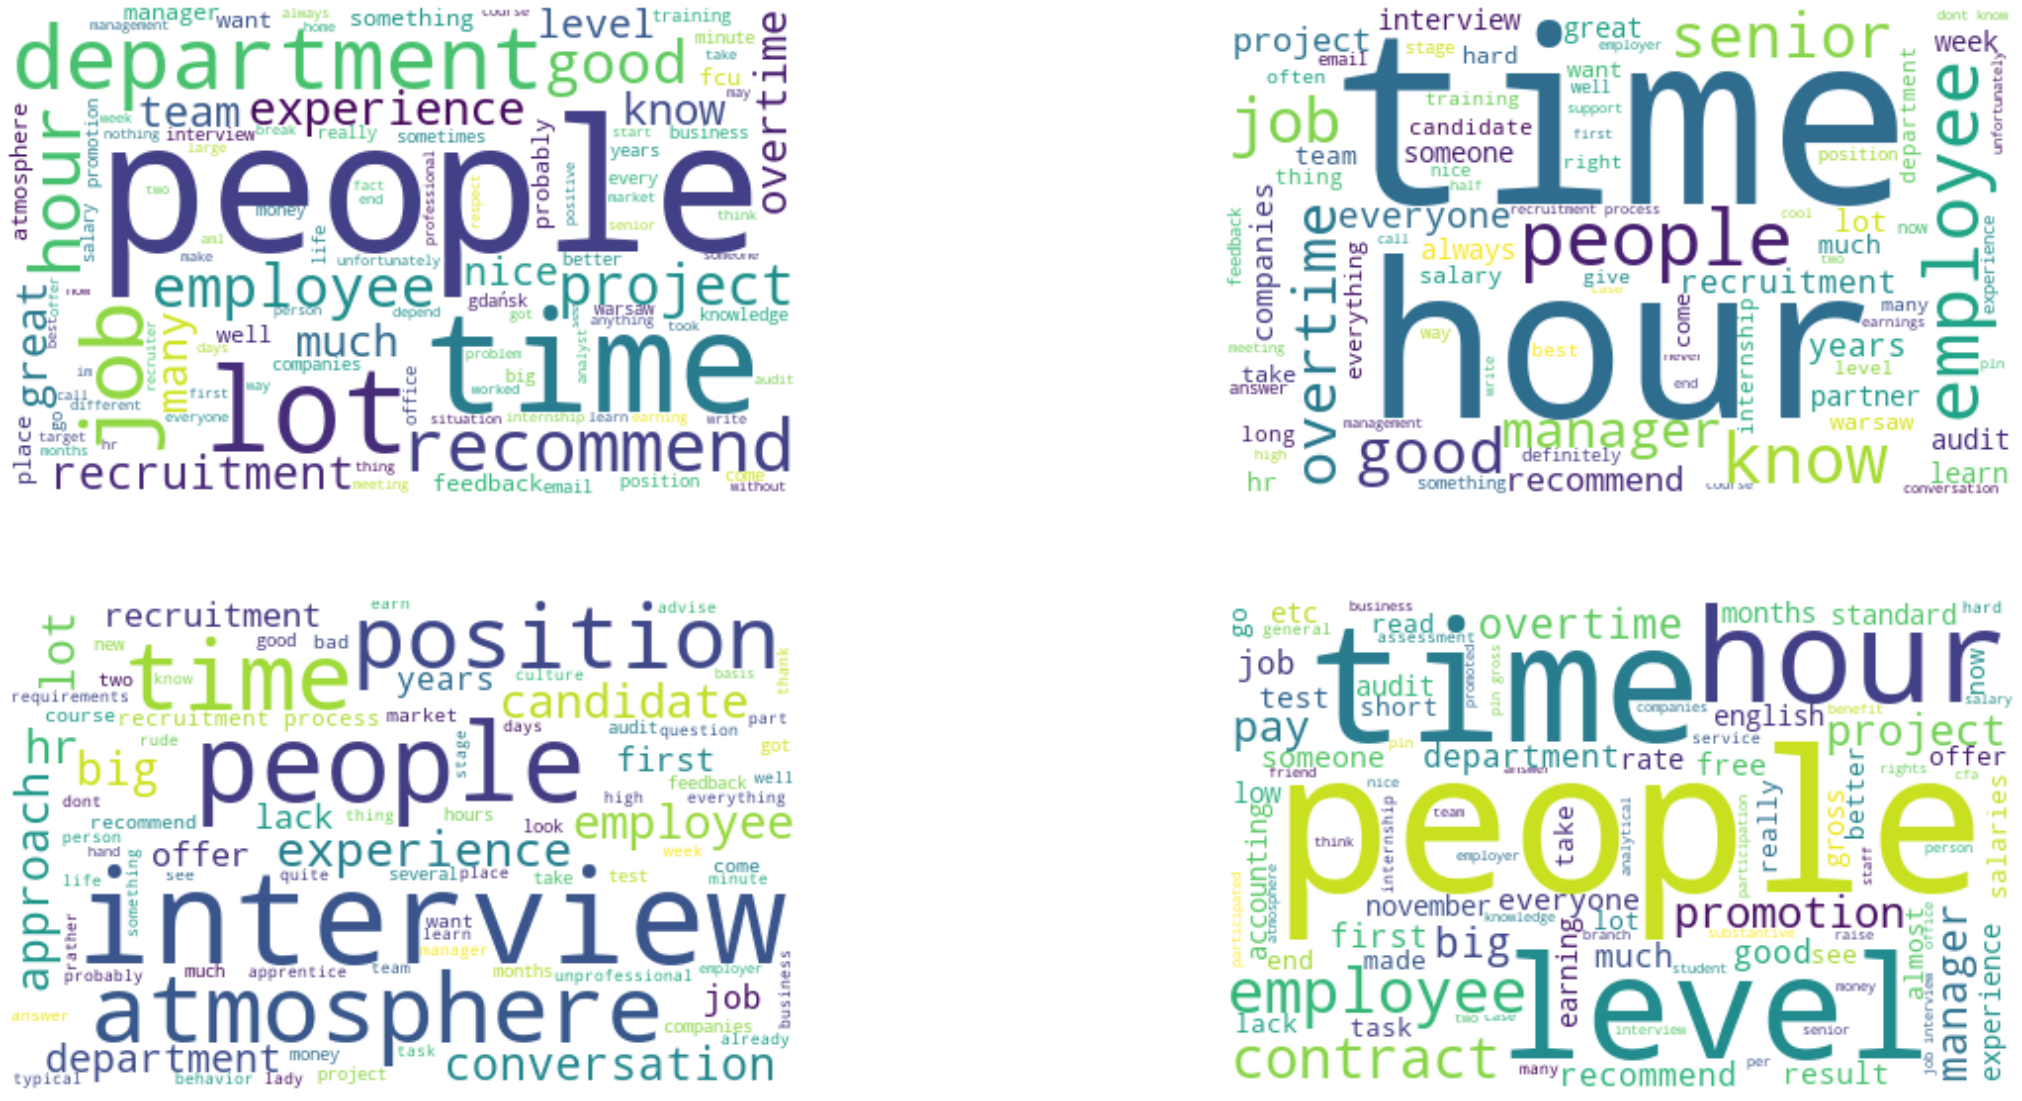

In [336]:
wc = WordCloud(background_color='white', max_words=700, height=250, stopwords=stopwords, min_font_size=7) 
fig, axes = plt.subplots(2,2, figsize = (40,20))

for idx, name in enumerate(['pwc', 'ey', 'kpmg', 'deloitte']):
    wc = wc.generate(ops_aggregated[name])
    axes.flatten()[idx].imshow(wc, interpolation = 'bilinear')
    axes.flatten()[idx].axis('off')
plt.show()

 - In PwC posts are about people, projects, experience, overtime is mentioned too.
 - In EY posts are about people, overtime, managers.
 - In KPMG posts are mainly about interview, candidates, atmosphere, people, approach and HR.
 - In Deloitte posts are about people, overtime, hours, projects, promotions.

In [227]:
#conda install -c conda-forge textblob

## Now TextBlob algorithm will be used in order to obtain posts' sentiment.

In [228]:
from textblob import TextBlob

In [229]:
pol = lambda x: TextBlob(x).sentiment.polarity
subj = lambda x: TextBlob(x).sentiment.subjectivity

dfs6 = []
for df in dfs5: # clean data
    df['Polarity'] = df['Opinion'].apply(pol)
    df['Subjectivity'] = df['Opinion'].apply(subj)
    dfs6.append(df)

In [230]:
pwc_sentiment = dfs6[0]
ey_sentiment = dfs6[1]
kpmg_sentiment = dfs6[2]
deloitte_sentiment = dfs6[3]
pwc_sentiment

,Timestamp,Opinion,Polarity,Subjectivity
0,2020-12-29 22:16:00,ive been working in this company for quite lon...,0.158103,0.507540
1,2021-03-20 11:44:00,the pwc values ​​proclaimed on the right and l...,0.127211,0.521088
2,2021-06-02 11:39:00,we are in mid while salaries at fcu are still ...,0.286134,0.454202
3,2021-06-28 23:05:00,i have been working at pwc for years and think...,0.231190,0.615476
4,2020-10-23 10:11:00,finally today there was info about hikes and b...,0.191667,0.658333
...,...,...,...,...
134,2014-10-16 15:31:00,a great place to meet really smart people lear...,0.252381,0.598810
135,2011-01-21 14:13:00,honestly you are part of huge machine your col...,0.040000,0.660000
136,2010-12-02 13:30:00,general psychosis enveloped in happiness corpo...,0.250000,0.233333
137,2010-12-02 13:29:00,people like rats work to lose strength then out,0.000000,0.000000


#### It seems that PwC has the best opinions, then EY and Deloitte are at the same position and KPMG has significantly worse opinions.

In [231]:
print('Average sentiment of PwC opinion: %.2f' % pwc_sentiment['Polarity'].mean())
print('Average sentiment of EY opinion: %.2f' % ey_sentiment['Polarity'].mean())
print('Average sentiment of KPMG opinion: %.2f' % kpmg_sentiment['Polarity'].mean())
print('Average sentiment of Deloitte opinion: %.2f' % deloitte_sentiment['Polarity'].mean())

Average sentiment of PwC opinion: 0.12
Average sentiment of EY opinion: 0.09
Average sentiment of KPMG opinion: 0.03
Average sentiment of Deloitte opinion: 0.07


#### PwC has the best opinions, EY is on the second place, Deloitte on the third, and KPMG is assessed indisputably the worst. Let's check how it has changed over time taking mean of polarity for every year.

In [232]:
dfs7= []
dfs_hist = []
for df in [pwc_sentiment, ey_sentiment, kpmg_sentiment, deloitte_sentiment]:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    dfs7.append(df)
    dfs_hist.append(df.groupby(df['Timestamp'].dt.year)['Polarity'].agg('mean'))

In [233]:
dfs_hist

[Timestamp
 2010    0.005556
 2011    0.040000
 2014    0.252381
 2015   -0.057222
 2016    0.164116
 2017    0.105750
 2018    0.029560
 2019    0.164786
 2020    0.118505
 2021    0.076803
 Name: Polarity, dtype: float64,
 Timestamp
 2012    0.140000
 2013   -0.150000
 2014    0.400000
 2015   -0.055989
 2016    0.155995
 2017    0.180070
 2018    0.083834
 2019    0.059167
 2020    0.051632
 2021    0.086857
 Name: Polarity, dtype: float64,
 Timestamp
 2009   -0.062294
 2010   -0.153333
 2013    0.000000
 2014    0.210476
 2015    0.092750
 2016    0.211856
 2017    0.089896
 2018   -0.006939
 2019   -0.016251
 2020   -0.055052
 2021   -0.023615
 Name: Polarity, dtype: float64,
 Timestamp
 2016    0.078466
 2017    0.066169
 2018   -0.119196
 2019    0.150359
 2020    0.085261
 2021    0.127363
 Name: Polarity, dtype: float64]

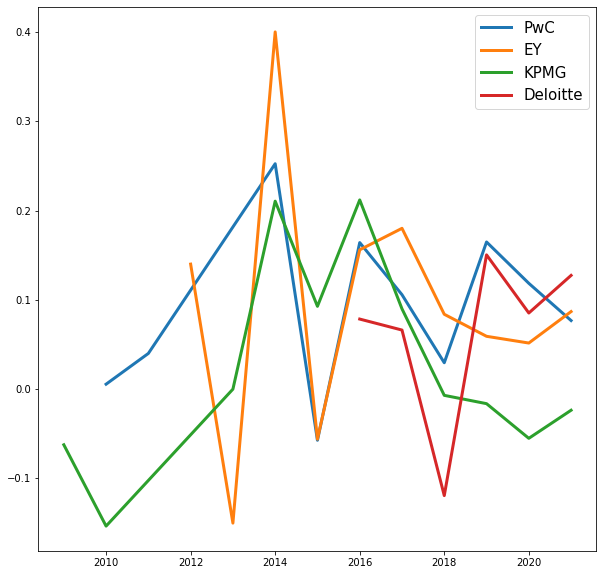

In [235]:
plt.figure(figsize = (12,12))
for df, name in zip(dfs_hist, ['PwC', 'EY', 'KPMG', 'Deloitte']):
    plt.plot(df.index, df.values, label = name, lw = 3)
plt.legend(fontsize = 15)
plt.show()

- To begin with, one should be aware that for PwC and EY there is more data (140 and 90 respectively) while for KPMG and Deloitte there is only about 50 so conclusions drawn about PwC and EY have stronger fundamentals. Moreover, TextBlob algorithm is only an approximation of reality, and higher reliability of inferences could be probably achieved using algorithms based on labeled data - especially due to possible information loss during translation from Polish language to English. 
- Nevertheless, it can be noticed that dynamics for these companies are pretty similar - one can easily observe simultaneous peaks and troughs. 
- All companies on average have moderately positive opinions. They are closer to neutral opinions than to positive ones. There must be a lot of negative opinions and positive opinions that approximately balance out. 
- KPMG has had the worst opinions of analysed companies and the posts were most unfavourable in 2010. Then it skyrocketed until 2016 and then plunged again to relatively negative. 
- In turn, EY had the worst opinions in 2013, then their polarity shot up and leveled off in recent years.
- For Deloitte, there was data since 2017 and opinions got more positive over time.
- PwC prides themselves on the best opinions, however it got a little bit less positive over time.
- For PwC and EY opinions are slightly worse than in the past.
- For Deloitte and KPMG there was a slight improvement.

In [236]:
#conda install -c conda-forge gensim


In [237]:
#conda install -c conda-forge spacy


In [238]:
# We make list of aggregated opinions, 1st element is aggregated opinions for PwC, 2nd for EY etc.
opinions = [value for key, value in ops_aggregated.items()]

In [239]:
len(opinions)

4

Now we have to tokenize them. We'll use gensim to do that.

In [240]:
import gensim

Now we want to make bigrams and trigrams of our tokens.

In [241]:
import nltk
#nltk.download('stopwords') # in order to keep it up-to-date

In [242]:
# firstly, we gather stop_words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print('There\'s %.0f stopwords' % len(stop_words))
stop_words[:10]

There's 179 stopwords


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [243]:
# Now we make function for tokenization. We make only words containing more than 2 characters that are not in stop words.
def tokenize_rem_stop(texts):
    return [[word for word in gensim.utils.simple_preprocess(text, min_len=3) if word not in stop_words] for text in texts]
# min_len of word is 2

In [244]:
len(tokenize_rem_stop(opinions)) # it makes list of lists, we have 4 lists in our main list

4

In [245]:
data_words = tokenize_rem_stop(opinions)
data_words[0][:5] # for pwc

['ive', 'working', 'company', 'quite', 'long']

### Now let's experiment with making ngrams using gensim.

In [293]:
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=20) # it takes lists of words and makes bigrams based on
# importance: min_count of occurences and a threshold (it returns onegrams and bigrams)
bigram_mod = gensim.models.phrases.Phraser(bigram) # this enables to cut memory resources needed
bigram_mod[data_words[0]][:10]# example for pwc

['ive',
 'working',
 'company',
 'quite',
 'long_time',
 'say',
 'fcu_gdańsk',
 'large',
 'german',
 'project']

In [294]:
trigram = gensim.models.Phrases(bigram[data_words], min_count=1, threshold=20) # it takes list of bigrams and one-grams
# and creates trigrams - it is possible to return 4grams if two 2grams are concatenated. Mostly produces 3grams.
trigram_mod = gensim.models.phrases.Phraser(trigram)
trigram_mod[bigram_mod[data_words[1]]][:10]#we trained trigram on bigram words so we have to provide bigrams to it here too

['recommend',
 'worked',
 'company',
 'almost_years',
 'disrespect',
 'employees',
 'treating',
 'employees',
 'objects',
 'routine']

In [248]:
# Now we create functions for making bigrams and trigrams
# They take list of words for every company and make bigrams (1grams and bigrams) or trigrams (1grams, bigrams and trigrams) for
# every company
def make_bigrams(texts):
    return [bigram_mod[text] for text in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[text]] for text in texts]

def lemmatization(texts, allowed_pos_tags = ['VERB', 'ADJ', 'NOUN', 'ADV']):
    texts_out = []
    for text in texts:
        text_joined = nlp(' '.join(text))
        texts_out.append([token.lemma_ for token in text_joined if token.pos_ in allowed_pos_tags])
    return texts_out
# What nlp does is that it takes text, tokenize it and for every token finds lemma and part of speech tag among others
# Our "text" is tokens - bigrams/trigrams in our case so we have to join them with ' ' to make it a continuous text
# Then we give it to nlp and for every token we take its lemma if pos tag is in allowed tags

In [249]:
import spacy
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [250]:
nlp = spacy.load('en_core_web_sm', disable= ['parser', 'ner'])

In [251]:
len(opinions)

4

In [252]:
data_words_nonstop = tokenize_rem_stop(opinions)
data_words_nonstop[0][:10] # 10 tokens for pwc

['ive',
 'working',
 'company',
 'quite',
 'long',
 'time',
 'say',
 'fcu',
 'gdańsk',
 'large']

In [253]:
data_bigrams = make_bigrams(data_words_nonstop)
data_bigrams[0][:10] # 10 bigrams for pwc

['ive',
 'working',
 'company',
 'quite',
 'long_time',
 'say',
 'fcu_gdańsk',
 'large',
 'german',
 'project']

In [295]:
data_trigrams = make_trigrams(data_bigrams)
data_trigrams[0][:10]

['ive',
 'working',
 'company',
 'quite',
 'long_time_say',
 'fcu',
 'large',
 'german',
 'project',
 'salary']

## Now that we know how this all works, let's transform our entire dataset.

In [297]:
data_lemmatized = lemmatization(data_trigrams)
data_lemmatized[0][:10] # lemmatized data for pwc, it enables to squish our data a little bit as for many variants of a specific verb
# or noun, we have one basic verb/noun that is their lemma

['ve',
 'work',
 'company',
 'quite',
 'long_time_say',
 'fcu',
 'large',
 'german',
 'project',
 'salary']

In [256]:
len(data_lemmatized)

4

In [257]:
print('PwC:')
print('Trigrams without lemmatization and POS filtering: ', len(data_trigrams[0]))
print('Trigrams after lemmatization and POS filtering: ', len(data_lemmatized[0]))
print('---------')
print('EY:')
print('Trigrams without lemmatization and POS filtering: ', len(data_trigrams[1]))
print('Trigrams after lemmatization and POS filtering: ', len(data_lemmatized[1]))
print('---------')
print('KPMG:')
print('Trigrams without lemmatization and POS filtering: ', len(data_trigrams[2]))
print('Trigrams after lemmatization and POS filtering: ', len(data_lemmatized[2]))
print('---------')
print('Deloitte:')
print('Trigrams without lemmatization and POS filtering: ', len(data_trigrams[3]))
print('Trigrams after lemmatization and POS filtering: ', len(data_lemmatized[3]))

PwC:
Trigrams without lemmatization and POS filtering:  5352
Trigrams after lemmatization and POS filtering:  4888
---------
EY:
Trigrams without lemmatization and POS filtering:  3193
Trigrams after lemmatization and POS filtering:  2914
---------
KPMG:
Trigrams without lemmatization and POS filtering:  1388
Trigrams after lemmatization and POS filtering:  1285
---------
Deloitte:
Trigrams without lemmatization and POS filtering:  1723
Trigrams after lemmatization and POS filtering:  1571


### We can certainly spot some reduction in features due to lemmatization. Now we are good to go making LDA!
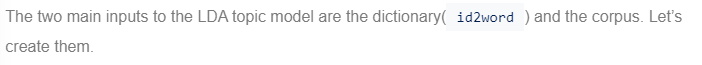

In [258]:
id2word = gensim.corpora.Dictionary(data_lemmatized) # creates dictionary of words, so (id: word) for every word in data

In [259]:
corpus = [id2word.doc2bow(text) for text in data_lemmatized] # converts DOCuments (lists of strings for every company) 
#into BOW (bag-of-words) format (id: count) for every company, i.e. it makes document-term frequency

In [260]:
corpus[0][:10] # 10 first lemmatized words in pwc opinions and their frequency in pwc opinions

[(0, 3),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1)]

## We take model with highest coherence score.

In [261]:
coherence_scores = []
for num_topics in [1,2,3,4]:
    lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word= id2word, random_state=1, num_topics=num_topics, \
                                               passes = 20, per_word_topics=True)
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

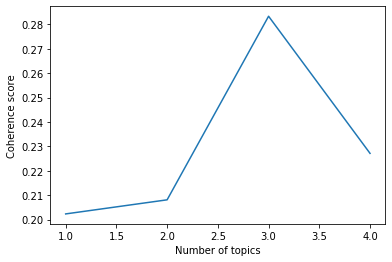

In [262]:
plt.plot(range(1,5), coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

At the beginning, it seems that 3 topics are optimal, but coherence score is really low which suggests that opinions for all companies are really similar.

In [263]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word= id2word, random_state=1, num_topics=3, \
                                               passes = 20, per_word_topics=True)

In [264]:
for idx, name in enumerate(['PwC', 'EY', 'KPMG', 'Deloitte']):
    print('Topic of posts for %s: ' % name, lda_model.get_document_topics(corpus[idx]))

Topic of posts for PwC:  [(1, 0.99985886)]
Topic of posts for EY:  [(1, 0.9997623)]
Topic of posts for KPMG:  [(1, 0.53957254), (2, 0.46016496)]
Topic of posts for Deloitte:  [(1, 0.9995605)]


In [265]:
lda_model.print_topics()

[(0,
  '0.000*"work" + 0.000*"people" + 0.000*"company" + 0.000*"get" + 0.000*"time" + 0.000*"know" + 0.000*"well" + 0.000*"employee" + 0.000*"job" + 0.000*"year"'),
 (1,
  '0.027*"work" + 0.017*"company" + 0.015*"people" + 0.008*"time" + 0.008*"get" + 0.006*"employee" + 0.006*"also" + 0.006*"good" + 0.005*"job" + 0.005*"project"'),
 (2,
  '0.010*"kpmg" + 0.009*"interview" + 0.004*"conversation" + 0.004*"atmosphere" + 0.003*"position" + 0.003*"approach" + 0.003*"lady" + 0.003*"offer" + 0.003*"rude" + 0.003*"look"')]

In [266]:
# now we'll ad a couple of stopwords
my_stopwords = ['will', 'one', 'still', 'even']

In [268]:
stop_words.extend(my_stopwords)

In [269]:
stop_words.extend(['deloitte', 'pwc', 'ey', 'kpmg'])

In [270]:
stop_words.extend(['gdańsk', 'warsaw'])

In [271]:
# I made new ngrams models with different parameters and we'll now take 4grams.
data_words_nonstop = tokenize_rem_stop(opinions)
bigram = gensim.models.Phrases(data_words_nonstop, min_count=2, threshold=5)
trigram = gensim.models.Phrases(bigram[data_words_nonstop], min_count=1, threshold=10)
fourgram = gensim.models.Phrases(trigram[bigram[data_words_nonstop]], min_count=1, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
fourgram_mod = gensim.models.phrases.Phraser(fourgram)

In [272]:
def make_fourgrams(texts):
    return [fourgram_mod[trigram_mod[bigram_mod[text]]] for text in texts]

In [273]:
data_trigrams = make_trigrams(data_words_nonstop)
data_fourgrams = make_fourgrams(data_words_nonstop)
data_bigrams = make_bigrams(data_words_nonstop)
data_lemmatized = lemmatization(data_fourgrams)
len(data_lemmatized)

4

In [274]:
# Moreover, we will make use of TFIDF model to improve LDA model.
id2word = gensim.corpora.Dictionary(data_lemmatized)
corpus = [id2word.doc2bow(text) for text in data_lemmatized]
tfidf = gensim.models.TfidfModel(corpus= corpus, id2word = id2word)
corpus = tfidf[corpus]
# We make term frequency inverse document frequency in order to make better features. Then, a word is more important if it 
# occurs more often in a document and simultaneously occurs in less documents

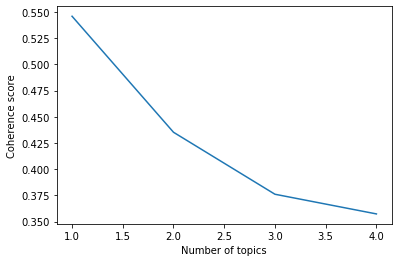

In [275]:
coherence_scores = []
for num_topics in [1,2,3,4]:
    lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word=id2word, num_topics=num_topics, passes = 20, \
                                               random_state=1, eta = 'auto', per_word_topics=True)
    coherence_model_lda = gensim.models.CoherenceModel(model = lda_model, texts=data_lemmatized, dictionary=id2word,coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)
plt.plot(range(1,5), coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()


TFIDF significantly improved coherence scores. LDA suggests 1 topic, but we'll use 2 for differentiation between companies anyway.

In [276]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word=id2word, num_topics=2, passes = 40, \
                                               random_state=1, eta='auto', per_word_topics=True)

In [277]:
lda_model.print_topics()

[(0,
  '0.000*"careful" + 0.000*"approach_candidate" + 0.000*"supervisor" + 0.000*"save" + 0.000*"exploit" + 0.000*"commute" + 0.000*"bike" + 0.000*"investment" + 0.000*"photo" + 0.000*"rude"'),
 (1,
  '0.000*"target" + 0.000*"increase" + 0.000*"lot_work" + 0.000*"fcu" + 0.000*"process" + 0.000*"hourly" + 0.000*"paper" + 0.000*"hear" + 0.000*"definitely" + 0.000*"colleague"')]

In [278]:
for idx, name in enumerate(['PwC', 'EY', 'KPMG', 'Deloitte']):
    print('Topic of posts for %s: ' % name, lda_model.get_document_topics(corpus[idx]))

Topic of posts for PwC:  [(0, 0.031430732), (1, 0.9685693)]
Topic of posts for EY:  [(0, 0.032124557), (1, 0.9678755)]
Topic of posts for KPMG:  [(0, 0.95819384), (1, 0.041806154)]
Topic of posts for Deloitte:  [(0, 0.962242), (1, 0.03775801)]


### It turns out that PwC and EY are assigned topic number 1. However, KPMG and Deloitte are assigned topic number 0. Now for every company keywords of its topic will be used to find posts containing them. Then, keywords with surrounding will be extracted from a post and analysed.

# PwC

In [301]:
# For every keyword from topic modelling we find it in a text, take it with surrounding and join with ',' for every opinion
# Then we substitute empty strings with np.NaN in order to filter out nulls and finally - print notnull rows
# Then we can analyse it row by row ourselves or stem it and take only adjectives for example in order to simplify
# Our dataset is not very abundant so we'll stick to manual reading
import numpy as np
for word in ['target', 'increas', 'lot of', 'lot of work', 'fcu','process', 'hourly', 'hour', 'paper', 'hear', 'definitely', 'colleague']:
    pattern = re.compile(r'[a-zA-Z\s]{2,30}\s*'+word+r'\s*[a-zA-Z\s]{2,30}')
    df = pwc.Opinion.apply(lambda x: ','.join(pattern.findall(x)))
    df[df==''] = np.NaN
    notnull_df = df[df.notnull()]
    print('\'%s\' occurences with surroundings:' % word)
    print('--------')
    for idx in notnull_df.index:
        print(idx, notnull_df[idx])
    print('\n')


'target' occurences with surroundings:
--------
18  some sick targets imposed and typical cronyism
22  you have to do your target and teach 
25  but a lot of work and such targets pwc funded that even this br
27  Now they impose new targets on us and make us work on we
46 and not understanding that the target can be done
47 p end and make you do the same targets as experienced people,gement is only interested in a target that most people cannot reach, you sit overtime to develop a target or do not worry about everyday
52  unrealistic targets
Management does not understa, only the target that is impossible to achieve ,that hardly anyone meets these targets and the bonus is lower


'increas' occurences with surroundings:
--------
0 y intervene with the client to increase the analysts
2  net increases for each level are
10  making it increasingly difficult to get promote
12  Profits are also increasing year by year despite covid
18 like the others that there are increases
25 also do AML a

### For PwC there is a couple of opinions that it's good for people to gain knowledge but there is a lot of trainings, work and overtime. Moreover, people complain the most about targets that often are very hard to achieve.

# EY

In [302]:
for word in ['target', 'increas', 'lot of', 'lot of work', 'fcu','process', 'hourly', 'hour', 'paper', 'hear', 'definitely', 'colleague']:
    pattern = re.compile(r'[a-zA-Z\s]{2,30}\s*'+word+r'\s*[a-zA-Z\s]{2,30}')
    df = ey.Opinion.apply(lambda x: ','.join(pattern.findall(x)))
    df[df==''] = np.NaN
    notnull_df = df[df.notnull()]
    print('\'%s\' occurences with surroundings:' % word)
    print('--------')
    for idx in notnull_df.index:
        print(idx, notnull_df[idx])
    print('\n')

'target' occurences with surroundings:
--------


'increas' occurences with surroundings:
--------
103  what kind of increase should be expected when swit
185 hat help companies stay in the increasingly demanding market


'lot of' occurences with surroundings:
--------
1 

I see a lot of negative comments about workin
8  I noticed that a lot of people from lower positions ar
11 
A lot of seniors are cool people, before the pandemic a lot of events and a lot of trips to c, there is a lot of work here,

There is a lot of training on paper
13  there will be a lot of work for me
27  there is not always a lot of work or the HR policy is not a
41  there is terrible chaos and a lot of stress
49  Is there a lot of overtime in these departments
56 guess is that there are also a lot of overtime
71  a lot of integration events
132 he EY company is looking for a lot of employees for Warsaw
141 then you have to sit and fix a lot of small things
143  There will be a lot of work
150  Young has a lot 

## In EY posts are about a lot of work and overtime.

# Deloitte

In [303]:
for word in ['careful', 'care', 'approach', 'candidat', 'supervisor', 'save','exploit', 'commute', 'commu', 'bike', 'invest', 'photo','rude']:
    pattern = re.compile(r'[a-zA-Z\s]{2,30}\s*'+word+r'\s*[a-zA-Z\s]{2,30}')
    df = deloitte.Opinion.apply(lambda x: ','.join(pattern.findall(x)))
    df[df==''] = np.NaN
    notnull_df = df[df.notnull()]
    print('\'%s\' occurences with surroundings:' % word)
    print('--------')
    for idx in notnull_df.index:
        print(idx, notnull_df[idx])
    print('\n')


'careful' occurences with surroundings:
--------


'care' occurences with surroundings:
--------
38 ood work for people who do not care about their private life and a,re careerists
45  my career is clearly moving in a posi
57 

If someone cares about this work 
66 ecause it only proves that you care about the internship


'approach' occurences with surroundings:
--------
40 A very unprofessional approach during the recruitment process, And seeing the approach to a potential candidate


'candidat' occurences with surroundings:
--------
5 unt their attitude towards the candidates
71 iew itself are the things that candidates should focus on 
72 iew itself are the things that candidates should focus on 
96  The more candidates


'supervisor' occurences with surroundings:
--------
47  but a situation in which one supervisor says that a person will get a , and then the higher supervisor tells you that you are getting


'save' occurences with surroundings:
--------
11  The management staff sa

## In Deloitte people say about overtime and a lot of work.

In [304]:
for word in ['careful', 'care', 'approach', 'candidat', 'supervisor', 'save','exploit', 'commute', 'commu', 'bike', 'invest', 'photo','rude']:
    pattern = re.compile(r'[a-zA-Z\s*]{2,50}\s*'+word+r'\s*[a-zA-Z\s*]{2,50}')
    df = kpmg.Opinion.apply(lambda x: ','.join(pattern.findall(x)))
    df[df==''] = np.NaN
    notnull_df = df[df.notnull()]
    print('\'%s\' occurences with surroundings:' % word)
    print('--------')
    for idx in notnull_df.index:
        print(idx, notnull_df[idx])
    print('\n')


'careful' occurences with surroundings:
--------
11 the most on the team and people and you have to be careful what you say and to whom
Fifthly
39 Please be careful when applying to KPMG
81  The only thing you should be careful about is that it is too large for a brush box in w


'care' occurences with surroundings:
--------
11 the most on the team and people and you have to be careful what you say and to whom
Fifthly
39 Please be careful when applying to KPMG
40  everyone cares about their own pocket
81  The only thing you should be careful about is that it is too large for a brush box 


'approach' occurences with surroundings:
--------
2 A very terrible approach from HR, that approach candidates more professionally
3  The lady also approached the topic in such a way that they would not was
6  unprofessional approach to a potential candidate for a job
11  you need to have a healthy approach to everything
19 ssed by the people who interviewed me because they approached me respectfully

## In KPMG complains are  about poor atmosphere and inadequate treatment of candidates (poor interviews and lack of feedback).